In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway, ttest_ind, chi2_contingency

In [262]:
df= pd.read_csv(r'C:\Users\yarde\OneDrive\שולחן העבודה\Projects\Data\loan_approval_dataset.csv')
df.sample(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1718,1719,4,Not Graduate,Yes,7600000,20000000,18,691,5000000,8700000,23400000,11200000,Approved
669,670,1,Graduate,No,6000000,20100000,6,476,13900000,10000000,15200000,5500000,Rejected
1391,1392,0,Not Graduate,Yes,1500000,4100000,12,789,3600000,1600000,5800000,1300000,Approved
217,218,4,Graduate,Yes,9600000,21100000,6,809,16100000,9500000,34700000,8700000,Approved
2765,2766,2,Not Graduate,No,2700000,6700000,8,413,7600000,800000,9200000,2300000,Rejected


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [264]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [265]:
df.duplicated(keep=False).sum()

0

In [266]:
df.columns = df.columns.str.strip()
#applies a function to every element of the DataFrame
df = df.applymap(lambda x: x.strip() if isinstance(x,str) else x)

C:\Users\yarde\AppData\Local\Temp\ipykernel_2092\3816442760.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x,str) else x)


In [267]:
df['residential_assets_value']= df['residential_assets_value'].abs()

In [331]:
#Add categorical column for cibil_score
def cibil_rating(value):
    if 300<=value<550:
        return 'Poor'
    elif 550<=value<650:
        return 'Average'
    elif 650<=value<750:
        return 'Good'
    elif 750<=value<=900:
        return 'Excellent'
    else:
        return 'Error'

df['Cibil Ratings']= df['cibil_score'].apply(cibil_rating)

In [269]:
#Add categorical column for income_annum
def income_levels(value):
    if 100000<=value<=1000000:
        return 'Low'
    elif 1000000<value<=4000000:
        return 'Low-Middle'
    elif 4000000<value<=7500000:
        return 'Upper-Middle'
    else:
        return 'High'

df['Income Levels']= df['income_annum'].apply(income_levels)

In [270]:
#Add categorical column for loan_amount
def loan_rating(value):
    if 100000<=value<=10000000:
        return 'Bronze'
    elif 10000000<value<=20000000:
        return 'Silver'
    elif 20000000<value<=30000000:
        return 'Gold'
    elif 30000000<value<=40000000:
        return 'Platinum'
    else:
        return 'Unknown'

df['Loan Rating']= df['loan_amount'].apply(loan_rating)

In [271]:
#Add categorical column for loan_term
bins = [0, 7, 14, 20, np.inf]
labels = ["Short-Term", "Intermediate", "Long-Term", "Unknown"]
df["Loan Term Type"] = pd.cut(df["loan_term"],
                               bins=bins,
                               labels=labels,
                               #include the first value
                               include_lowest=True)

In [272]:
#Add categorical column for no_of_dependents
bins = [0, 1, 3, 5, np.inf]
labels = ["Low", "Moderate", "High", "Unknown"]
df["Dependent Levels"] = pd.cut(df["no_of_dependents"],
                               bins=bins,
                               labels=labels,
                               include_lowest=True)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Cibil Ratings,Income Levels,Loan Rating,Loan Term Type,Dependent Levels
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High


**Income**

In [273]:
income= df['Income Levels'].value_counts().reset_index()
income.rename(columns={"count":'Number Of Applicants'},inplace=True)
income

,Income Levels,Number Of Applicants
0,Upper-Middle,1548
1,Low-Middle,1284
2,High,1047
3,Low,390


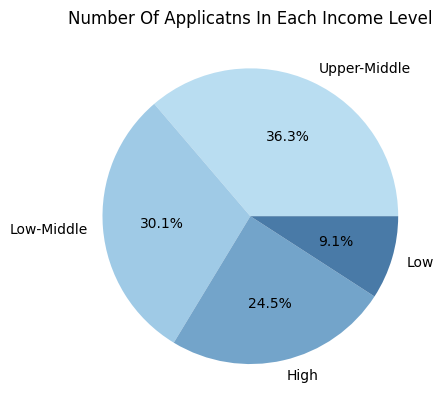

In [294]:
#Pie chart
colors = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"]
plt.pie(income['Number Of Applicants'],
        labels=income['Income Levels'],
        autopct='%1.1f%%',
       colors=colors)

plt.title('Number Of Applicatns In Each Income Level')
plt.show()

**Dependents**

In [280]:
dependents= df['Dependent Levels'].value_counts().reset_index()
dependents.rename(columns={"count":'Number Of Applicants'},inplace=True)
dependents = dependents[dependents['Dependent Levels'] != 'Unknown']
dependents

,Dependent Levels,Number Of Applicants
0,Moderate,1435
1,High,1425
2,Low,1409


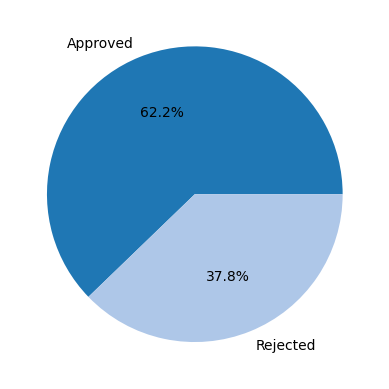

In [297]:
loans= df['loan_status'].value_counts().reset_index()
loans.rename(columns={"count":'Total'},inplace=True)

colors = ['#1f77b4', '#aec7e8']
plt.pie(loans['Total'], labels=loans['loan_status'], autopct='%1.1f%%', colors=colors)
plt.show()

In [299]:
education= df.groupby(['education','loan_status']).size().reset_index()
education

,education,loan_status,0
0,Graduate,Approved,1339
1,Graduate,Rejected,805
2,Not Graduate,Approved,1317
3,Not Graduate,Rejected,808


In [309]:
pivot_table= education.pivot(index='education', columns='loan_status', values=0)
row_totals= pivot_table.sum(axis=1)
percentage= pivot_table.div(row_totals, axis=0).round(4) * 100
percentage

loan_status,Approved,Rejected
education,,
Graduate,62.45,37.55
Not Graduate,61.98,38.02


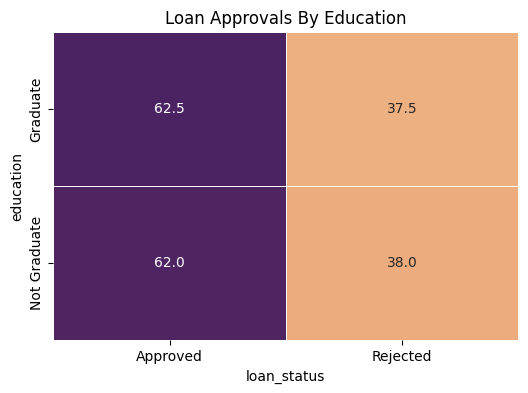

In [323]:
plt.figure(figsize=(6,4))
sns.heatmap(percentage, annot=True, fmt='.1f', cmap='flare', linewidth=0.5, cbar=False)
plt.title('Loan Approvals By Education')
plt.show()

In [324]:
cibil_rates= df.groupby(['Cibil Ratings', 'loan_status']).size().reset_index()
cibil_rates= civbil_rates.rename(columns={0:'Total'})
cibil_rates

,Cibil Ratings,loan_status,Total
0,Average,Approved,681
1,Average,Rejected,2
2,Excellent,Approved,1050
3,Excellent,Rejected,6
4,Good,Approved,740
5,Good,Rejected,5
6,Poor,Approved,185
7,Poor,Rejected,1600


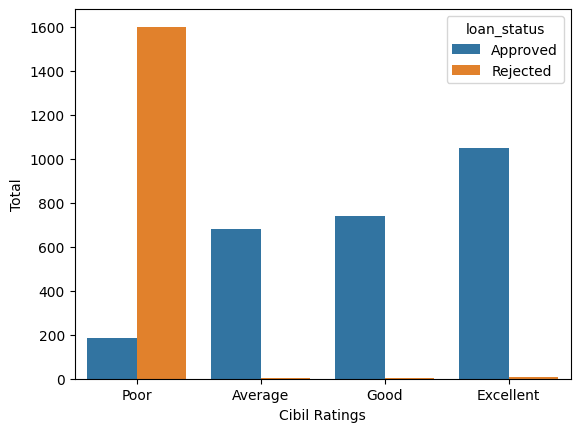

In [332]:
desired_order = ['Poor','Average','Good','Excellent']
sns.barplot(data=cibil_rates, x='Cibil Ratings', y='Total', hue='loan_status',order=desired_order)

plt.show()

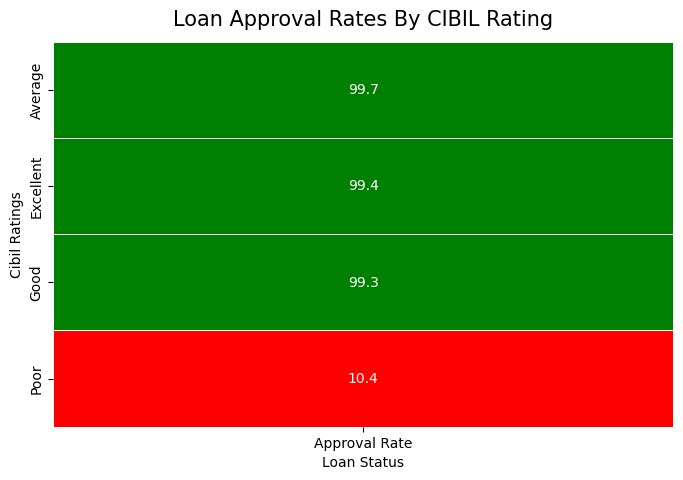

In [374]:
pivot_table = cibil_rates.pivot_table(index='Cibil Ratings', columns='loan_status', values='Total')
pivot_table['Approval Rate'] = pivot_table['Approved'] / (pivot_table['Approved'] + pivot_table['Rejected']) * 100

custom_palette = sns.color_palette(["red", "green"])

plt.figure(figsize=(8,5))
sns.heatmap(pivot_table[['Approval Rate']], annot=True, fmt='.1f' ,cmap=custom_palette, linewidth=0.5, cbar=False)
plt.title('Loan Approval Rates By CIBIL Rating', y=1.02, fontsize=15)
plt.xlabel('Loan Status')
plt.show()

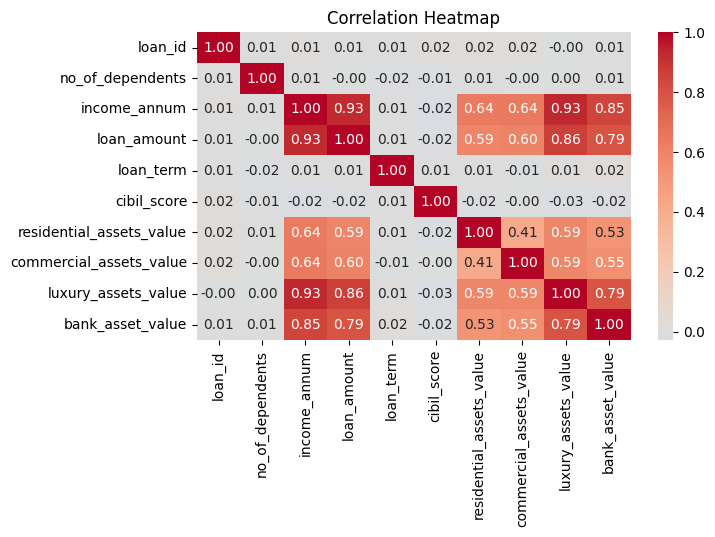

In [370]:
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()